# Notebbook #1 Exploring the data

In [1]:
import pandas as pd
import numpy as np

### IMPORT data

In [2]:
from merge_years.import_data import get_full_data

In [13]:
full_data = get_full_data('../raw_data')

### *** LAST 4 GAMES FUNCTION ***

input a feature and get a summary of that features in the last 4 games (av and values)

In [ ]:
def summary(player, features, games = 4):
    features[0:0] = ['name', 'GW', 'kickoff_time']
    df = full_data[full_data['name'] == player]
    df = df[features].tail(games)
    df.loc['mean'] = df.mean()
    return df

summary("paul pogba", ["minutes", "value"], 7)

### Testing a model for 3 players

Lloris, Pogba, Van Dijk

In [8]:
def test_dataset_maker(players):
    frames = []
    for player in players:
        player_stats = full_data[full_data["name"] == player]
        frames.append(player_stats)
    return pd.concat(frames) 

In [25]:
players = ["virgil van dijk", "paul pogba", "hugo lloris"]
test_dataset = test_dataset_maker(players)
test_dataset.shape

(570, 35)

In [26]:
test_dataset.shape[0]

570

*** SET THE INDEX ***

In [28]:
test_dataset = test_dataset.set_index(np.linspace(1, test_dataset.shape[0], num=test_dataset.shape[0], dtype=int))

In [29]:
test_dataset[["total_points"]].iloc[[1,2,3]]
test_dataset[["total_points"]].head()

,total_points
1,1
2,1
3,2
4,0
5,7


### SET MOVING AVERAGE for all dataset

In [30]:
def moving_a(df, points = 'total_points', days = 4):
    
    ### check shape of input df
    print(f"input shape = {df.shape}")
    
    # get a list of all players
    players_list = df.name.unique()
    
    # preparing the list of dataframe of each players with their m_a scores
    # we will conncat these back later to make the output df
    players_df_with_ma = []
    
    ### print how many players are in the df
    print(f"# players = {len(players_list)}")
    
    for player in players_list:
        
        # creating a unique DF for each player
        unique_player_df = df[df["name"] == player]
        
        # adding the moving average for each player
        unique_player_df["moving_a"] = unique_player_df[f'{points}'].rolling(days).mean()
        
        #appending each player's DF to the list of players DFs
        players_df_with_ma.append(unique_player_df)
        
    #concatenating players df into the output df
    output = pd.concat(players_df_with_ma)
    
    ### check shape of output df
    print(f"output shape = {output.shape}")
    return output

full_data_ma = moving_a(full_data)

input shape = (114937, 35)
# players = 1515


<ipython-input-30-59b3b6856d2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_player_df["moving_a"] = unique_player_df[f'{points}'].rolling(days).mean()


output shape = (114937, 36)


In [31]:
full_data_ma.moving_a.isna().value_counts()

False    110435
True       4502
Name: moving_a, dtype: int64

In [36]:
full_data_ma[full_data_ma["name"] == "paul pogba"][["name", "season", "GW", "total_points", "moving_a"]].head(20)

,name,season,GW,total_points,moving_a
88890,paul pogba,17,1,0,NaN
88891,paul pogba,17,2,3,NaN
88892,paul pogba,17,3,3,NaN
88893,paul pogba,17,4,2,2.00
88894,paul pogba,17,5,1,2.25
88895,paul pogba,17,6,8,3.50
88896,paul pogba,17,7,2,3.25
88897,paul pogba,17,8,3,3.50
88898,paul pogba,17,9,1,3.50
88899,paul pogba,17,10,2,2.00


### *** VISUALIZER FUNCTION***

see a player's performance through time

In [39]:
import matplotlib.pyplot as plt

In [62]:
def points_visualizer(player):
    person = test_dataset_maker([f"{player}"])
    fig = plt.figure(figsize = (16, 6))
    plt.plot(str(person.kickoff_date), person.total_points)
    plt.xlabel("Game Weeks")
    plt.ylabel("Total Points")
    plt.title(f"{player}")
    return plt.show()

ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

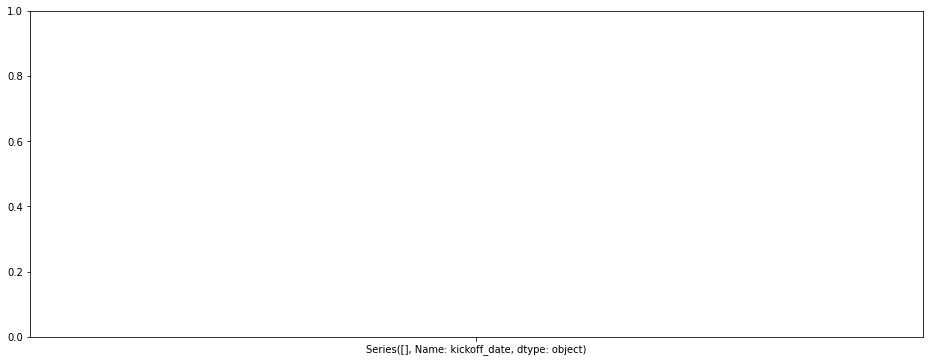

In [64]:
points_visualizer(["harry kane"])

In [61]:
person = test_dataset_maker(["harry kane"])
#person[["season", "GW", "kickoff_date","total_points"]].head(40)

person.kickoff_date.shape, person.total_points.shape

((190,), (190,))